In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Rayleigh Scattering Length / cm')

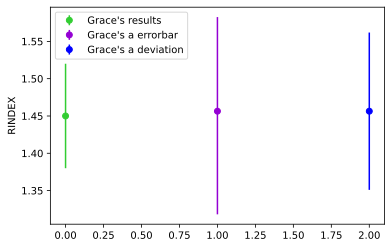

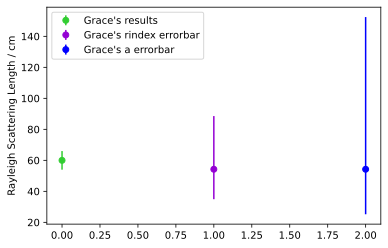

In [3]:
# Grace 2017
fig1 = plt.figure(1)
plt.errorbar([0], [1.45], yerr=[[0.07], [0.07]], fmt="o", color='limegreen', label="Grace's results")
plt.errorbar([1], [ 1.45641], yerr=[[1.45641-1.31816], [1.58262-1.45641]],
    fmt="o", color='darkviolet', label="Grace's a errorbar")
plt.errorbar([2], [1.45641], yerr=[[0.105462],[0.105462]], fmt="o", color='blue', label="Grace's a deviation")

plt.legend(loc='upper left')
plt.ylabel("RINDEX")



fig2 = plt.figure(2)
plt.errorbar([0], [60], yerr=[[6], [6]], fmt="o", color='limegreen', label="Grace's results")
plt.errorbar([1], [54.2612], yerr=[[54.2612-34.9314], [88.553-54.2612]],
    fmt="o", color='darkviolet', label="Grace's rindex errorbar")
plt.errorbar([2], [54.2612], yerr=[[54.2612-25.2117], [152.428-54.2612]],
    fmt="o", color='blue', label="Grace's a errorbar")


plt.legend(loc='upper left')
plt.ylabel("Rayleigh Scattering Length / cm")

Text(0, 0.5, 'rindex')

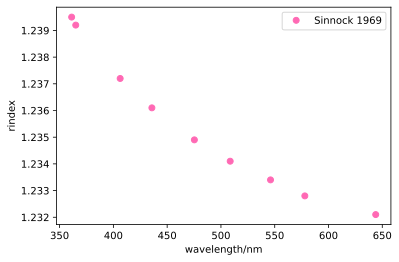

In [4]:
# data used by Grace's fitting (LAr 83.81K)
wavelength = [361.2, 365, 406.3, 435.8, 475.3, 508.6, 546.1, 578, 643.9]
rindex = [1.2395, 1.2392, 1.2372, 1.2361, 1.2349, 1.2341, 1.2334, 1.2328, 1.2321]
plt.plot(wavelength, rindex, "o", color='hotpink', label="Sinnock 1969")
plt.legend()
plt.xlabel("wavelength/nm")
plt.ylabel("rindex")


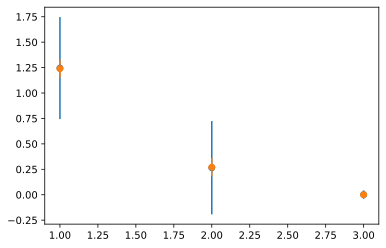

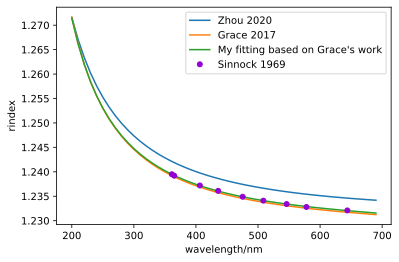

In [20]:
# Compare rindex formula between Zhou and Grace:
import numpy as np

def sellmeier_func(x):
    f1 = 0.2075
    f2 = 0.0415
    f3 = 4.3330
    l1 = 91.012
    l2 = 89.892
    l3 = 214.02
    rhol = 35.49
    rhog = 44.66E-3

    return np.sqrt(3/(1-1.2055E-2*2/3*(rhol/rhog)*( f1/(l1-1/x/x) + f2/(l2-1/x/x) + f3/(l3-1/x/x) ) ) -2)

def my_func(x):
    a0 = 1.24526
    aUV = 2.65822e-01
    aIR = 6.01569e-04
    lUV = 106.6
    lIR = 908.3

    return np.sqrt(a0+aUV*x**2/(x**2-lUV**2)+aIR*x**2/(x**2-lIR**2))   

def grace_func(x):
    a0 = 1.24
    aUV = 0.27
    aIR = 0.00047
    lUV = 106.6
    lIR = 908.3

    return np.sqrt(a0+aUV*x**2/(x**2-lUV**2)+aIR*x**2/(x**2-lIR**2))

wl_arr = np.arange(200, 700, 10)
sel_arr = []
gra_arr = []
my_arr  = []
for elem in wl_arr:
    sel_arr.append(sellmeier_func(elem/1000.) )
    gra_arr.append(grace_func(elem) )
    my_arr.append(my_func(elem))

plt.figure(1)
plt.errorbar([1, 2, 3], [1.24526, 2.65822e-01, 6.01569e-04], yerr=[5.01570e-01, 4.58267e-01, 4.16347e-02], fmt="o", label="My fitting")
plt.errorbar([1, 2, 3], [1.24, 0.27, 0.00047], yerr=[0.09, 0.09, 0.007], fmt="o", label="Grace's fitting")
plt.show()

plt.figure(2)
plt.plot(wl_arr, sel_arr, label="Zhou 2020")
plt.plot(wl_arr, gra_arr, label="Grace 2017")
plt.plot(wl_arr, my_arr, label="My fitting based on Grace's work")

plt.plot(wavelength, rindex, "o", ms=5, color='darkviolet', label="Sinnock 1969")

plt.legend()
plt.xlabel("wavelength/nm")
plt.ylabel("rindex")
plt.show()
